# Programación como Herramienta para la Ingeniería 2020-2
## Ayudantía 3: Análisis de datos en python
### Ayudante: Pablo Seisdedos (pcseisdedos@uc.cl)

In [1]:
import pandas as pd
from IPython.display import display

In [2]:
areas = {'California': 423967, 'Texas': 695662, 'New York': 141297, 'Florida': 170312, 'Illinois': 149995}
poblaciones = {'California': 38332521, 'Texas': 26448193, 'New York': 19651127, 'Florida': 19552860, 'Illinois': 12882135}

In [3]:
area = pd.Series(areas)
population = pd.Series(poblaciones)
data = pd.DataFrame({'area':area, 'population':population})
data

,area,population
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [4]:
diccionario = {'area': {"California":    423967,
                         "Texas":         695662,
                         "New York":      141297,
                         "Florida":       170312,
                         "Illinois":      149995},
               'population': {"California":    38332521,
                         "Texas":         26448193,
                         "New York":      19651127,
                         "Florida":       19552860,
                         "Illinois":      12882135
                         }
                       }

In [5]:
diccionario

{'area': {'California': 423967,
  'Texas': 695662,
  'New York': 141297,
  'Florida': 170312,
  'Illinois': 149995},
 'population': {'California': 38332521,
  'Texas': 26448193,
  'New York': 19651127,
  'Florida': 19552860,
  'Illinois': 12882135}}

In [6]:
pd.DataFrame(diccionario)

,area,population
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [13]:
data[['area',"population"]]

,area,population
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [14]:
data['Texas':'Illinois']

,area,population
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [15]:
data[1:3]

,area,population
Texas,695662,26448193
New York,141297,19651127


In [16]:
data.loc[:'Texas',:'area']

,area
California,423967
Texas,695662


In [17]:
data.iloc[:4,:1]

,area
California,423967
Texas,695662
New York,141297
Florida,170312


In [18]:
data['density'] = data['population'] / data['area']
data

,area,population,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [19]:
data.loc[(data.density > 100) & (data.population >1500000), ['population', 'area']]

,population,area
New York,19651127,141297
Florida,19552860,170312


In [20]:
data

,area,population,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


## Concatenación y joins

In [21]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display(df1,df2)

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [22]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [23]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
df4

,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


In [24]:
display(df3, df4, pd.merge(df3, df4))

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


In [25]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
df3

,name,salary
0,Bob,70000
1,Jake,80000
2,Lisa,120000
3,Sue,90000


In [28]:
dfm = pd.merge(df1, df3, left_on="employee", right_on="name")
display(df1, df3, dfm)

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,name,salary
0,Bob,70000
1,Jake,80000
2,Lisa,120000
3,Sue,90000


,employee,group,name,salary
0,Bob,Accounting,Bob,70000
1,Jake,Engineering,Jake,80000
2,Lisa,Engineering,Lisa,120000
3,Sue,HR,Sue,90000


## Introducción a sklearn

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import datasets, metrics, neighbors, decomposition, manifold
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 16})

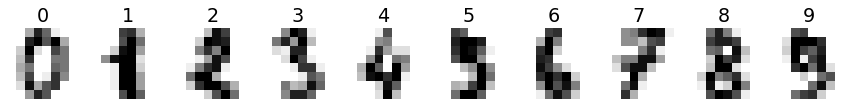

In [30]:
digits = datasets.load_digits()

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(1, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % label)
plt.show()

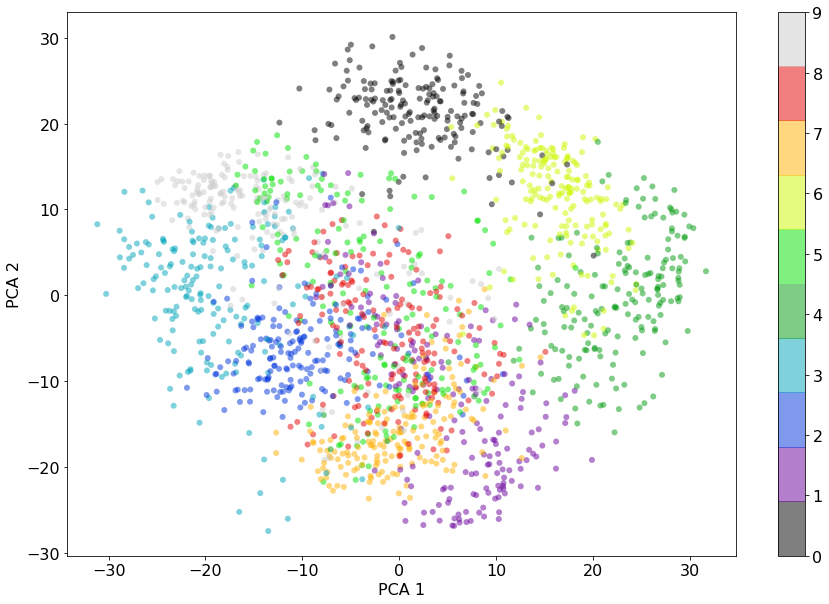

In [31]:
pca = decomposition.PCA(n_components=2)
projected = pca.fit_transform(digits.data)

plt.scatter(projected[:, 0], projected[:, 1], c=digits.target, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar()

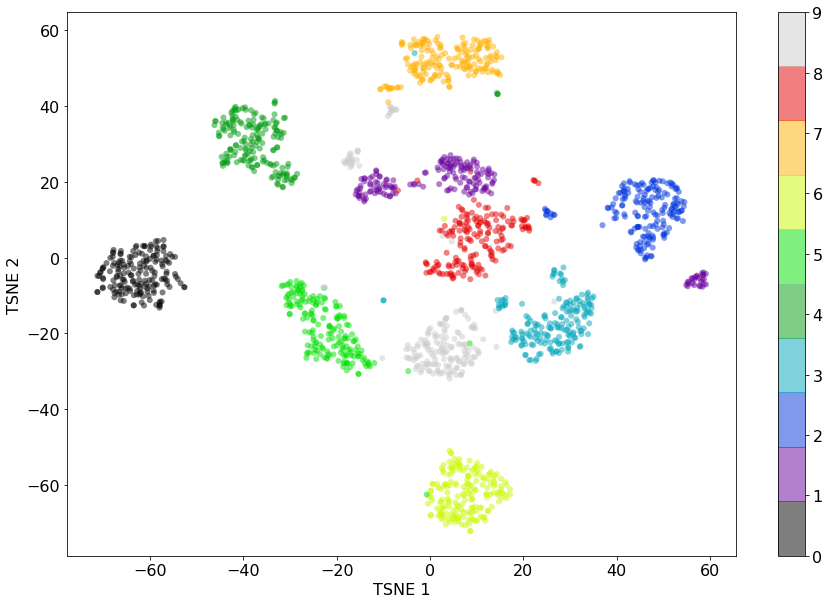

In [32]:
TSNE = manifold.TSNE(n_components=2)
projected = TSNE.fit_transform(digits.data)

plt.scatter(projected[:, 0], projected[:, 1], c=digits.target, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.colorbar()

### Modelo K vecinos más cercanos con K=1

In [33]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
classifier = neighbors.KNeighborsClassifier(n_neighbors=1)
classifier.fit(data[n_samples // 2:], digits.target[n_samples // 2:])

KNeighborsClassifier(n_neighbors=1)

Analicemos algunas métricas

Accuracy: 0.9588093536510108
Confusion matrix:


<AxesSubplot:>

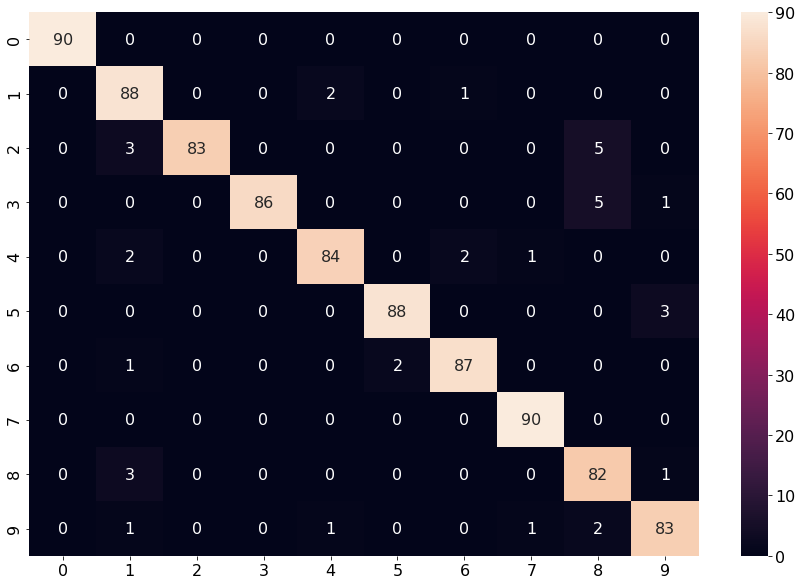

In [34]:
expected = digits.target[:n_samples // 2]
predicted = classifier.predict(data[:n_samples // 2])

print("Accuracy: %s" % metrics.balanced_accuracy_score(expected, predicted))
print("Confusion matrix:")
sns.heatmap(metrics.confusion_matrix(expected, predicted), annot=True)

veamos algunos resultados

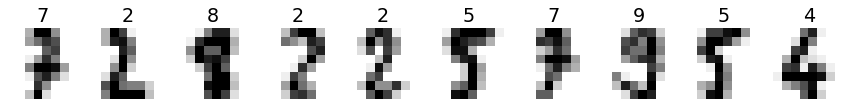

In [35]:
images_and_predictions = list(zip(digits.images[:n_samples // 2], predicted))
for index, (image, label) in enumerate(images_and_predictions[-10:]):
    plt.subplot(1, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % label)
plt.show()

## Otros modelos más elaborados

In [37]:
iris = sns.load_dataset('iris')
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


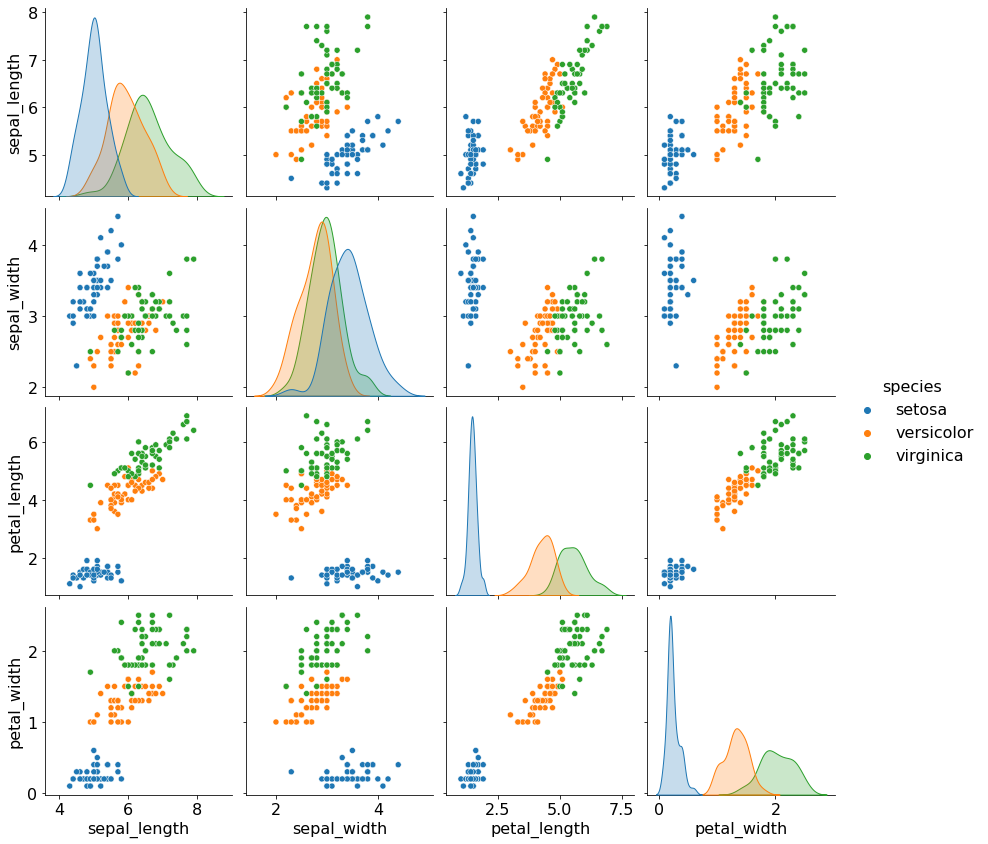

In [38]:
sns.pairplot(iris, hue='species', height=3)

In [39]:
X = iris.drop('species', axis=1)
y = iris['species']

In [40]:
X.shape, y.shape

((150, 4), (150,))

In [41]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [42]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

Generamos set de entrenamiento y testeo

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [44]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
predicted = knn.predict(X_test)

Medidas de rendimiento

Accuracy: 0.9269005847953217
Confusion matrix:


<AxesSubplot:>

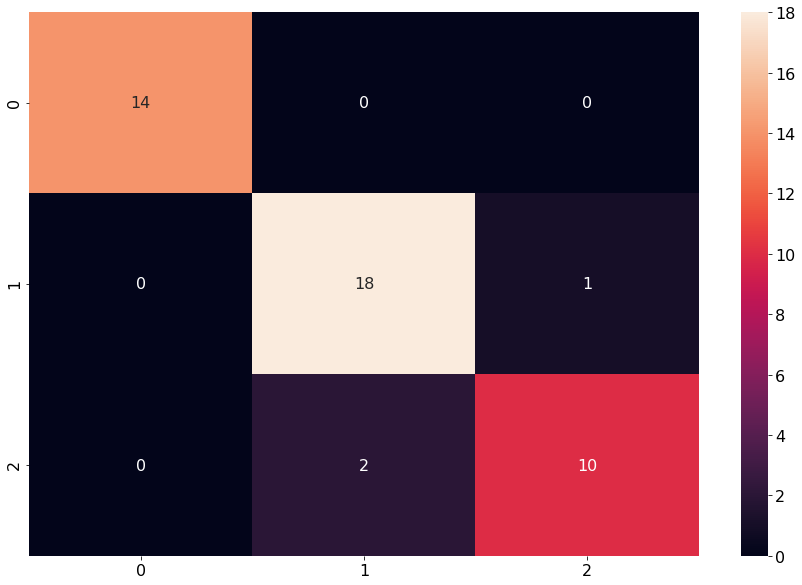

In [45]:
print("Accuracy: %s" % metrics.balanced_accuracy_score(y_test, predicted))
print("Confusion matrix:")
sns.heatmap(metrics.confusion_matrix(y_test, predicted), annot=True)

In [54]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=100) #5 7, 10
tree.fit(X_train, y_train)
predicted = tree.predict(X_test)

Accuracy: 0.9269005847953217
Confusion matrix:


<AxesSubplot:>

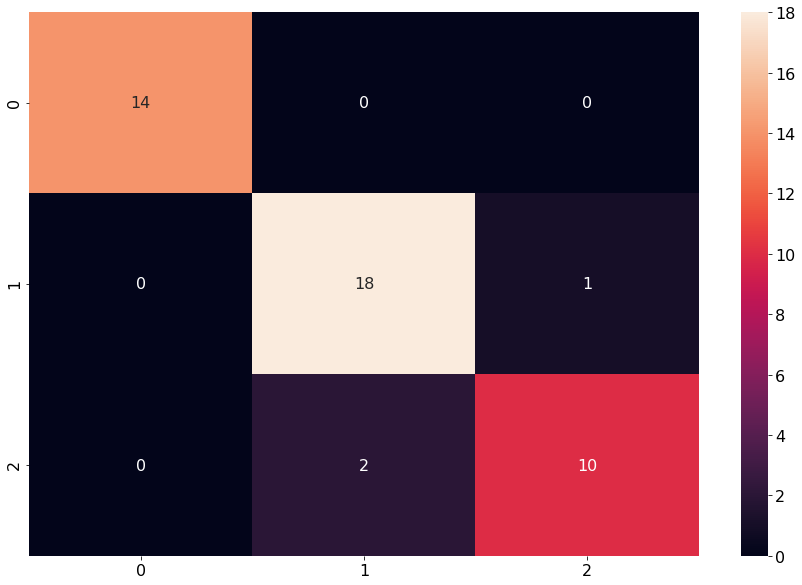

In [55]:
#Medidas de rendimiento
print("Accuracy: %s" % metrics.balanced_accuracy_score(y_test, predicted))
print("Confusion matrix:")
sns.heatmap(metrics.confusion_matrix(y_test, predicted), annot=True)

In [60]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=1) #numero de arboles
forest.fit(X_train, y_train)
predicted = forest.predict(X_test)

Medidas de rendimiento

Accuracy: 0.9166666666666666
Confusion matrix:


<AxesSubplot:>

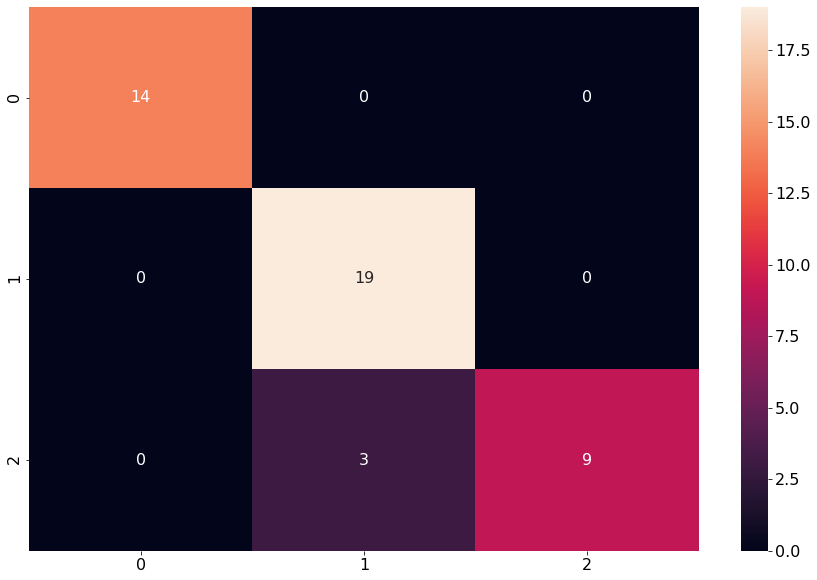

In [61]:
print("Accuracy: %s" % metrics.balanced_accuracy_score(y_test, predicted))
print("Confusion matrix:")
sns.heatmap(metrics.confusion_matrix(y_test, predicted), annot=True)

Accuracy: 0.9555555555555556
Balanced accuracy: 0.9546783625730993
Confusion matrix:


<AxesSubplot:>

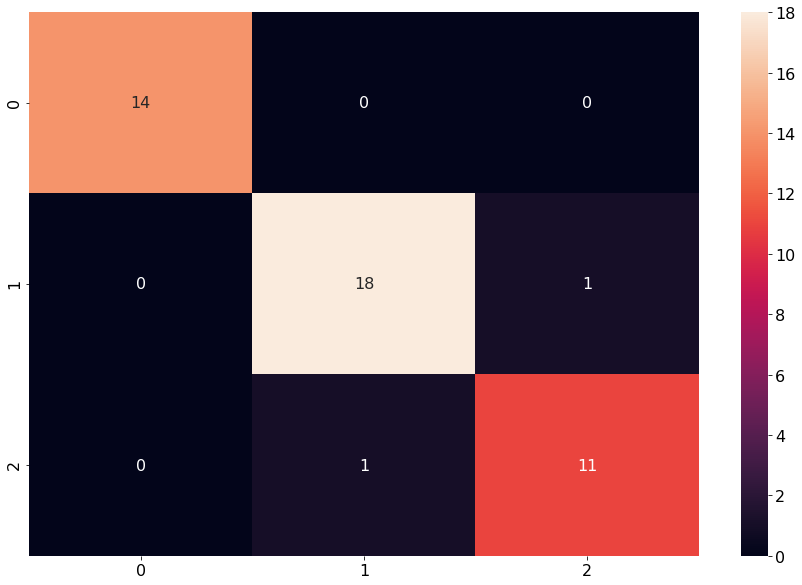

In [64]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf') #linear, poly, rbf
svm.fit(X_train, y_train)
predicted = svm.predict(X_test)

#Medidas de rendimiento
print("Accuracy: %s" % metrics.accuracy_score(y_test, predicted))
print("Balanced accuracy: %s" % metrics.balanced_accuracy_score(y_test, predicted))
print("Confusion matrix:")
sns.heatmap(metrics.confusion_matrix(y_test, predicted), annot=True)

Accuracy: 0.9824561403508771
Confusion matrix:


<AxesSubplot:>

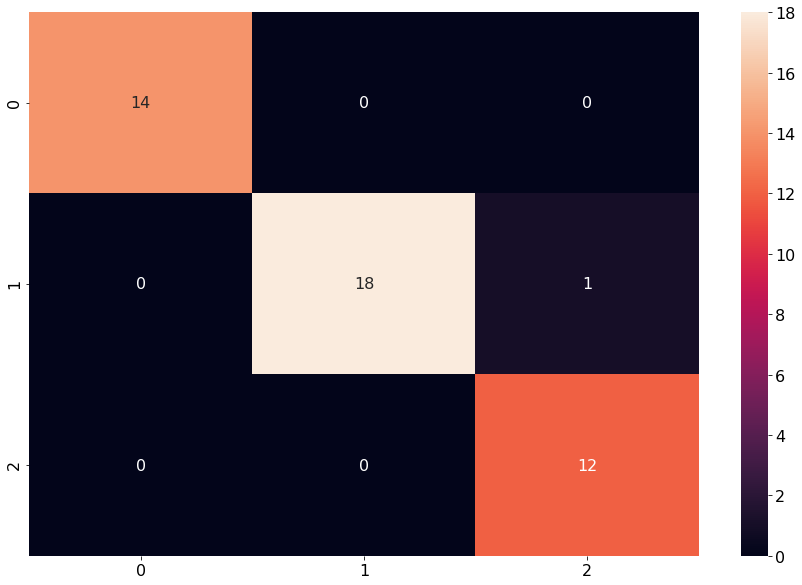

In [68]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10000) # 10
mlp.fit(X_train, y_train)
predicted = mlp.predict(X_test)

#Medidas de rendimiento
print("Accuracy: %s" % metrics.balanced_accuracy_score(y_test, predicted))
print("Confusion matrix:")
sns.heatmap(metrics.confusion_matrix(y_test, predicted), annot=True)